In [278]:
import numpy as np #PAra algebra lineal
import pandas as pd #Procesamiento de datos
import matplotlib.pyplot as plt #Graficar
import seaborn as sns #Visualizar datos
from collections import Counter
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
#Preprocesamiento de datos.
from sklearn.preprocessing import MinMaxScaler

#Librerias de Redes Neuronales
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

#Métricas de Validación

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [279]:
dfTrain = pd.read_csv("train.csv")
dfTrain

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [280]:
dfTest = pd.read_csv("test.csv")
dfTest

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [281]:
labels = ['Cheap', 'Mid', 'Expensive']

dfTrain['SalePrice'] = pd.cut(dfTrain['SalePrice'], 3, labels=labels)

dfTrain

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,Cheap
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,Cheap
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,Cheap
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,Cheap
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,Cheap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,Cheap
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,Cheap
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,Cheap
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,Cheap


In [282]:
dfTrain.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [283]:
mapping = {'Cheap': 1, 'Mid': 2, 'Expensive': 3}
dfTrain['SalePrice'] = dfTrain['SalePrice'].map(mapping)

In [284]:
df = pd.concat([dfTrain, dfTest], sort=False)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [285]:
dfNC = df.select_dtypes(include=['int64', 'float64']).columns

In [286]:
scaler = StandardScaler()
df[dfNC] = scaler.fit_transform(df[dfNC])

In [287]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.731458,0.067331,RL,-0.184481,-0.217879,Pave,NaN,Reg,Lvl,AllPub,...,-0.06315,NaN,NaN,NaN,-0.089592,-1.552184,0.157646,WD,Normal,1
1,-1.730271,-0.873616,RL,0.458190,-0.072044,Pave,NaN,Reg,Lvl,AllPub,...,-0.06315,NaN,NaN,NaN,-0.089592,-0.446925,-0.602962,WD,Normal,1
2,-1.729084,0.067331,RL,-0.055946,0.137197,Pave,NaN,IR1,Lvl,AllPub,...,-0.06315,NaN,NaN,NaN,-0.089592,1.026753,0.157646,WD,Normal,1
3,-1.727897,0.302568,RL,-0.398704,-0.078385,Pave,NaN,IR1,Lvl,AllPub,...,-0.06315,NaN,NaN,NaN,-0.089592,-1.552184,-1.363569,WD,Abnorml,1
4,-1.726711,0.067331,RL,0.629569,0.518903,Pave,NaN,IR1,Lvl,AllPub,...,-0.06315,NaN,NaN,NaN,-0.089592,2.132012,0.157646,WD,Normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.726711,2.419700,RM,-2.069648,-1.043937,Pave,NaN,Reg,Lvl,AllPub,...,-0.06315,NaN,NaN,NaN,-0.089592,-0.078505,-1.363569,WD,Normal,NaN
1455,1.727897,2.419700,RM,-2.069648,-1.049263,Pave,NaN,Reg,Lvl,AllPub,...,-0.06315,NaN,NaN,NaN,-0.089592,-0.815344,-1.363569,WD,Abnorml,NaN
1456,1.729084,-0.873616,RL,3.885767,1.246808,Pave,NaN,Reg,Lvl,AllPub,...,-0.06315,NaN,NaN,NaN,-0.089592,1.026753,-1.363569,WD,Abnorml,NaN
1457,1.730271,0.655424,RL,-0.313015,0.034605,Pave,NaN,Reg,Lvl,AllPub,...,-0.06315,NaN,MnPrv,Shed,1.144312,0.289914,-1.363569,WD,Normal,NaN


### X_train

In [288]:
qMapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
eMapping = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1}
fMapping = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1}
gfMapping = {'Fin': 3, 'RFn': 2, 'Unf': 1}
pdMapping = {'Y': 3, 'P': 2, 'N': 1}
fpMapping = {"Ex":6,"Gd":5,"TA":4,"Fa":3,"Po":2,"NA":1}

oFeatures = {
    'ExterQual': qMapping, 'ExterCond': qMapping,
    'BsmtQual': qMapping, 'BsmtCond': qMapping,
    'BsmtFinType1': fMapping, 'BsmtFinType2': fMapping,
    'HeatingQC': qMapping,
    'KitchenQual': qMapping,
    'GarageFinish': gfMapping,
    'GarageQual': qMapping, 'GarageCond': qMapping,
    'PavedDrive': pdMapping,
    'FireplaceQu' : fpMapping
}

for f, m in oFeatures.items():
    df[f] = df[f].map(m)

nominals = [
    'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
    'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
    'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'SaleType'
]

dfEncoded = pd.get_dummies(df, columns=nominals, drop_first=True)

In [289]:
dfEncoded.shape

(2919, 198)

In [290]:
for i in dfEncoded.columns:
    if dfEncoded[i].dtypes == "object":
        print(i)

Alley
RoofStyle
BsmtExposure
PoolQC
Fence
MiscFeature
SaleCondition


In [291]:
dfEncoded.drop([
    "Alley","PoolQC","Fence","MiscFeature","OverallCond","Id",
    "MiscVal","YrSold","3SsnPorch","LowQualFinSF","SaleCondition",
    "RoofStyle","BsmtUnfSF","BsmtFinSF1","BsmtFinSF2","BsmtExposure"
],axis=1,inplace=True)

In [292]:
dfEncoded.dropna(inplace=True)

In [293]:
dfEncoded.isnull().sum()

MSSubClass        0
LotFrontage       0
LotArea           0
OverallQual       0
YearBuilt         0
                 ..
SaleType_ConLI    0
SaleType_ConLw    0
SaleType_New      0
SaleType_Oth      0
SaleType_WD       0
Length: 182, dtype: int64

In [294]:
X = dfEncoded.drop('SalePrice', axis = 1)
y = dfEncoded["SalePrice"]

In [295]:
X

,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
1,-0.873616,0.458190,-0.072044,-0.063185,0.154764,-0.395604,-0.569991,3,3,4.0,...,False,False,False,False,False,False,False,False,False,True
2,0.067331,-0.055946,0.137197,0.646183,0.980221,0.848965,0.333506,4,3,4.0,...,False,False,False,False,False,False,False,False,False,True
3,0.302568,-0.398704,-0.078385,0.646183,-1.859351,-0.682812,-0.569991,3,3,3.0,...,False,True,False,False,False,False,False,False,False,True
4,0.067331,0.629569,0.518903,1.355551,0.947203,0.753229,1.382009,4,3,4.0,...,False,False,False,False,False,False,False,False,False,True
6,-0.873616,0.243967,-0.010667,1.355551,1.079276,0.992569,0.467357,4,3,5.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,0.067331,0.458190,-0.021319,1.355551,0.782111,0.561757,1.872797,4,3,4.0,...,False,False,False,False,False,False,False,False,False,True
1451,-0.873616,0.372501,-0.114907,1.355551,1.211349,1.184041,0.511974,4,3,4.0,...,False,False,False,False,False,False,False,True,False,False
1455,0.067331,-0.313015,-0.285470,-0.063185,0.914184,0.753229,-0.569991,3,3,4.0,...,False,False,False,False,False,False,False,False,False,True
1456,-0.873616,0.672414,0.381311,-0.063185,0.220801,0.178812,0.093689,3,3,4.0,...,False,False,False,False,False,False,False,False,False,True


In [296]:
y

1       1
2       1
3       1
4       1
6       2
       ..
1447    1
1451    2
1455    1
1456    1
1457    1
Name: SalePrice, Length: 584, dtype: category
Categories (3, int64): [1 < 2 < 3]

### Separamos la data

In [297]:
#Lo convertimos en un lista de numpy
X = np.array(X)
y = np.array(y)

### Dividimos en entrenamiento y prueba

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [299]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(467, 181) (117, 181) (467,) (117,)


### Escalamos la data

In [300]:
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

# 3. Construimos, compilamos y ajustamos el modelo
### Para SalePrice categorizado


### Empezamos a construir

In [301]:
model = Sequential() #Para construir la red de manera simple.
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) #1000 neuronas, 
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear')) #Nodo de salida
model.summary() # Ver la arquitectura del modelo

c:\Users\josea\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 1000)           │       182,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │           251 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 808,001 (3.08 MB)

 Trainable params: 808,001 (3.08 MB)

 Non-trainable params: 0 (0.00 B)

### Compilamos el modelo

In [302]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [303]:
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=100,
                   restore_best_weights = True)

### Ajsutamos el modelo

In [304]:
X_train.dtype
y_train.dtype

X_train

array([[0.29411765, 0.13356164, 0.02584693, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.26369863, 0.04564418, ..., 0.        , 0.        ,
        1.        ],
       [0.23529412, 0.19520548, 0.03961323, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.23529412, 0.15068493, 0.05771545, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.15068493, 0.02487767, ..., 0.        , 0.        ,
        1.        ],
       [0.17647059, 0.09931507, 0.03726266, ..., 0.        , 0.        ,
        1.        ]])

In [305]:
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=5000,
                    batch_size=50,
                    verbose=1)


Epoch 1/5000


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.2000 - mae: 1.1734 - val_loss: 0.0964 - val_mae: 0.2478
Epoch 2/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1349 - mae: 0.2699 - val_loss: 0.1020 - val_mae: 0.2731
Epoch 3/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1704 - mae: 0.3192 - val_loss: 0.0888 - val_mae: 0.2293
Epoch 4/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1619 - mae: 0.3010 - val_loss: 0.0777 - val_mae: 0.1940
Epoch 5/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1456 - mae: 0.2796 - val_loss: 0.1186 - val_mae: 0.2553
Epoch 6/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1430 - mae: 0.2903 - val_loss: 0.2504 - val_mae: 0.4312
Epoch 7/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2232 - mae: 0.3648 - val_loss: 0.3162 - val_mae: 0.4513
Epoch 8/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1789 - mae: 0.3373 - val_loss: 0.0810 - val_mae: 0.2153
Epoch 9/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1023 -

### Graficamos

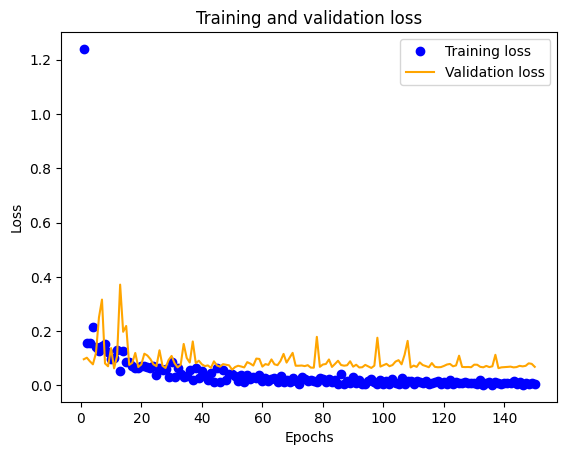

In [306]:
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1) # Numero de Epochs, para X
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


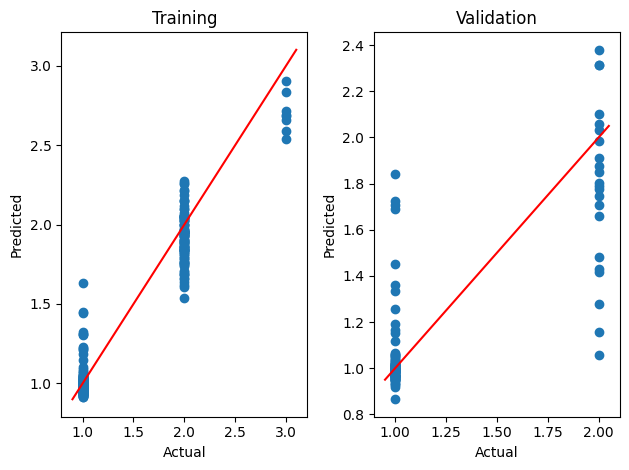

In [307]:
fig, axes = plt.subplots(1,2) # 1 fila, dos columnas


# Entrenamiento
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# Linea de 45 grados
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validacion
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# Linea de 45 grados
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')
# Pequeña separación entre gráficas.
fig.tight_layout()




# 4. Predecimos

In [308]:

pred = model.predict(X_test)
pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step


array([[1.1546866 ],
       [1.841714  ],
       [0.97132987],
       [1.6579847 ],
       [1.0169959 ],
       [2.0574121 ],
       [1.2565919 ],
       [1.0522115 ],
       [0.99617815],
       [1.028814  ],
       [2.1030385 ],
       [2.3155618 ],
       [1.4499779 ],
       [0.9632864 ],
       [1.0100498 ],
       [1.0071754 ],
       [1.2800137 ],
       [2.3154857 ],
       [1.0212079 ],
       [1.0131879 ],
       [0.9295607 ],
       [1.8494247 ],
       [1.0147681 ],
       [1.7442653 ],
       [0.949569  ],
       [0.9713354 ],
       [1.8771406 ],
       [0.99366283],
       [0.9799827 ],
       [0.96481353],
       [0.86520106],
       [1.0147005 ],
       [0.9958244 ],
       [0.9263012 ],
       [1.9860338 ],
       [0.9549187 ],
       [0.9520953 ],
       [0.98592263],
       [1.0194002 ],
       [1.9126424 ],
       [0.95489985],
       [0.99447995],
       [0.958691  ],
       [2.3799462 ],
       [1.0186558 ],
       [0.9823946 ],
       [0.99807584],
       [1.035

# 5. Métricas

In [309]:


trainpreds = model.predict(X_train)

print("MAE Entrenamiento: ",mean_absolute_error(y_train, trainpreds)) # Entrenamiento
print("MAE Prueba: ",mean_absolute_error(y_test, pred)) # Prueba

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MAE Entrenamiento:  0.0646700103482036
MAE Prueba:  0.12445022356815827


In [310]:
mse = mean_squared_error(y_test, pred)
print("MSE: ",mse)

MSE:  0.05802802494580127


In [311]:
r2 = r2_score(y_test, pred)
print("R²: ", r2)


R²:  0.6199303189076202


MAE Entrenamiento (SVR):  0.09419445130337127
MAE Prueba (SVR):  0.2676177152511648
MSE (SVR):  0.1147233126762692
R² (SVR):  0.3445544961496456


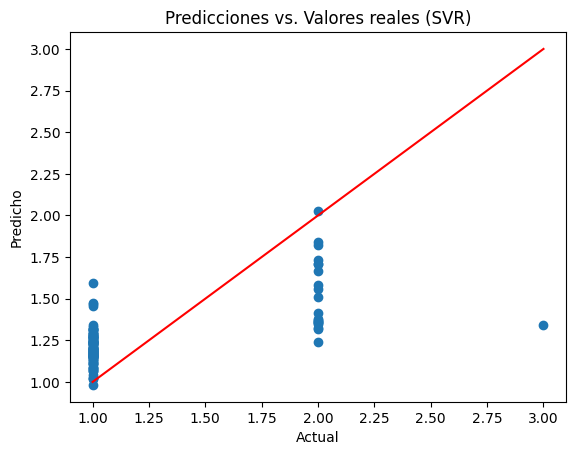

In [312]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo SVR
model_svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

# Entrenar el modelo
model_svr.fit(X_train, y_train)

# Predicción en el conjunto de prueba
pred_svr = model_svr.predict(X_test)

# Calcular métricas de evaluación
mae_train_svr = mean_absolute_error(y_train, model_svr.predict(X_train))
mae_test_svr = mean_absolute_error(y_test, pred_svr)
mse_svr = mean_squared_error(y_test, pred_svr)
r2_svr = r2_score(y_test, pred_svr)

print("MAE Entrenamiento (SVR): ", mae_train_svr)
print("MAE Prueba (SVR): ", mae_test_svr)
print("MSE (SVR): ", mse_svr)
print("R² (SVR): ", r2_svr)

# Graficar resultados
plt.scatter(y_test, pred_svr)
plt.xlabel("Actual")
plt.ylabel("Predicho")
plt.title("Predicciones vs. Valores reales (SVR)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # línea de referencia
plt.show()


## RED NEURONAL PARA SALE Price sin categorizar

In [313]:
dfTrain = pd.read_csv("train.csv")
dfTrain

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [314]:
dfTest = pd.read_csv("test.csv")
dfTest

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [315]:
df = pd.concat([dfTrain, dfTest], sort=False)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [316]:
dfNC = df.select_dtypes(include=['int64', 'float64']).columns

In [317]:
scaler = StandardScaler()
df[dfNC] = scaler.fit_transform(df[dfNC])

In [318]:
qMapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
eMapping = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1}
fMapping = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1}
gfMapping = {'Fin': 3, 'RFn': 2, 'Unf': 1}
pdMapping = {'Y': 3, 'P': 2, 'N': 1}
fpMapping = {"Ex":6,"Gd":5,"TA":4,"Fa":3,"Po":2,"NA":1}

oFeatures = {
    'ExterQual': qMapping, 'ExterCond': qMapping,
    'BsmtQual': qMapping, 'BsmtCond': qMapping,
    'BsmtFinType1': fMapping, 'BsmtFinType2': fMapping,
    'HeatingQC': qMapping,
    'KitchenQual': qMapping,
    'GarageFinish': gfMapping,
    'GarageQual': qMapping, 'GarageCond': qMapping,
    'PavedDrive': pdMapping,
    'FireplaceQu' : fpMapping
}

for f, m in oFeatures.items():
    df[f] = df[f].map(m)

nominals = [
    'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
    'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
    'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'SaleType'
]

dfEncoded = pd.get_dummies(df, columns=nominals, drop_first=True)

In [319]:
for i in dfEncoded.columns:
    if dfEncoded[i].dtypes == "object":
        print(i)

Alley
RoofStyle
BsmtExposure
PoolQC
Fence
MiscFeature
SaleCondition


In [320]:
dfEncoded.drop([
    "Alley","PoolQC","Fence","MiscFeature","OverallCond","Id",
    "MiscVal","YrSold","3SsnPorch","LowQualFinSF","SaleCondition",
    "RoofStyle","BsmtUnfSF","BsmtFinSF1","BsmtFinSF2","BsmtExposure"
],axis=1,inplace=True)

In [321]:
dfEncoded.dropna(inplace=True)

In [322]:
dfEncoded.isnull().sum()

MSSubClass        0
LotFrontage       0
LotArea           0
OverallQual       0
YearBuilt         0
                 ..
SaleType_ConLI    0
SaleType_ConLw    0
SaleType_New      0
SaleType_Oth      0
SaleType_WD       0
Length: 182, dtype: int64

In [323]:
X = dfEncoded.drop('SalePrice', axis = 1)
y = dfEncoded["SalePrice"]

In [324]:
#Lo convertimos en un lista de numpy
X = np.array(X)
y = np.array(y)

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [326]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(467, 181) (117, 181) (467,) (117,)


In [327]:
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [328]:
model = Sequential() #Para construir la red de manera simple.
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) #1000 neuronas, 
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear')) #Nodo de salida
model.summary() # Ver la arquitectura del modelo

c:\Users\josea\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                │ (None, 1000)           │       182,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 1)              │           251 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 808,001 (3.08 MB)

 Trainable params: 808,001 (3.08 MB)

 Non-trainable params: 0 (0.00 B)

In [329]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [330]:
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

In [331]:
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=5000,
                    batch_size=50,
                    verbose=1)


Epoch 1/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.7110 - mae: 1.2048 - val_loss: 0.5005 - val_mae: 0.5109
Epoch 2/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7711 - mae: 0.6192 - val_loss: 0.2790 - val_mae: 0.4088
Epoch 3/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4726 - mae: 0.4476 - val_loss: 0.4608 - val_mae: 0.4690
Epoch 4/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5630 - mae: 0.5029 - val_loss: 0.2972 - val_mae: 0.4089
Epoch 5/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3856 - mae: 0.4215 - val_loss: 0.4933 - val_mae: 0.5250
Epoch 6/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3563 - mae: 0.4294 - val_loss: 0.6913 - val_mae: 0.6543
Epoch 7/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5233 - mae: 0.4585 - val_loss: 0.2014 - val_mae: 0.3166
Epoch 8/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2598 - mae: 0.3190 - val_loss: 0.1711 - val_mae: 0.3025
Epoch 9/5000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - l

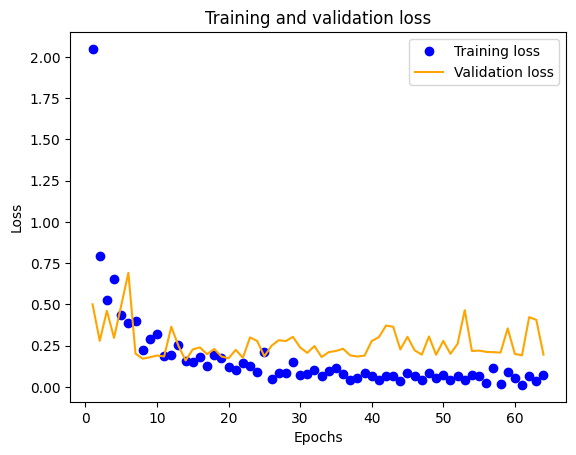

In [332]:
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1) # Numero de Epochs, para X
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


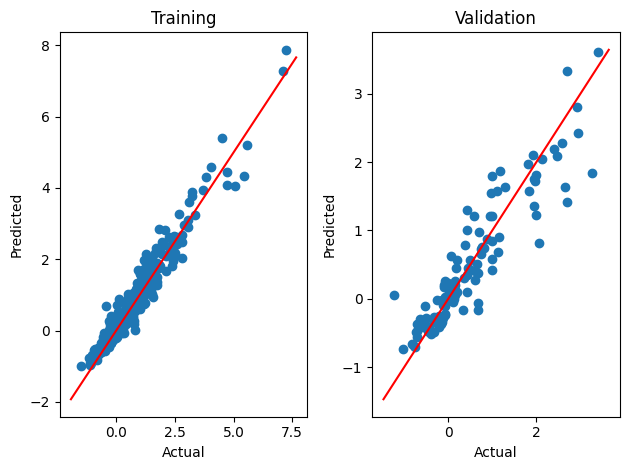

In [333]:
fig, axes = plt.subplots(1,2) # 1 fila, dos columnas


# Entrenamiento
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# Linea de 45 grados
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validacion
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# Linea de 45 grados
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')
# Pequeña separación entre gráficas.
fig.tight_layout()




In [334]:

pred = model.predict(X_test)
pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[ 8.0996168e-01],
       [ 1.5771756e+00],
       [-9.9935316e-02],
       [ 1.8342949e+00],
       [-2.2174731e-01],
       [ 2.0497322e+00],
       [ 7.4270946e-01],
       [-3.6207643e-01],
       [ 1.2365139e-01],
       [ 3.4354562e-01],
       [ 2.8109219e+00],
       [ 2.1949046e+00],
       [ 1.2081625e+00],
       [-4.3969586e-02],
       [-6.6256559e-01],
       [-4.9278152e-01],
       [ 1.4216974e+00],
       [ 3.3316393e+00],
       [ 2.0692958e-01],
       [-3.6303499e-01],
       [-2.4449652e-01],
       [ 1.6290100e+00],
       [ 9.0679973e-01],
       [ 1.9715799e+00],
       [-6.9322340e-02],
       [ 2.0392461e-01],
       [ 2.2748969e+00],
       [ 4.4335449e-01],
       [-2.6994660e-03],
       [-3.6294329e-01],
       [-2.1630000e-02],
       [ 9.7923326e-01],
       [ 1.2129831e+00],
       [-2.9265571e-01],
       [ 2.4306214e+00],
       [ 2.6446205e-01],
       [-2.6965520e-01],
       [ 8.7771248e-03],
       [-2.7880558e-01],
       [ 2.1022351e+00],


In [335]:


trainpreds = model.predict(X_train)

print("MAE Entrenamiento: ",mean_absolute_error(y_train, trainpreds)) # Entrenamiento
print("MAE Prueba: ",mean_absolute_error(y_test, pred)) # Prueba

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MAE Entrenamiento:  0.19937407553876252
MAE Prueba:  0.27475258384721596


In [336]:
mse = mean_squared_error(y_test, pred)
print("MSE: ",mse)

MSE:  0.16000338752165924


In [337]:
r2 = r2_score(y_test, pred)
print("R²: ", r2)


R²:  0.8453001323992724


MAE Entrenamiento (SVR):  0.09271551954264719
MAE Prueba (SVR):  0.48297247698702
MSE (SVR):  0.5084632693903294
R² (SVR):  0.466575007521292


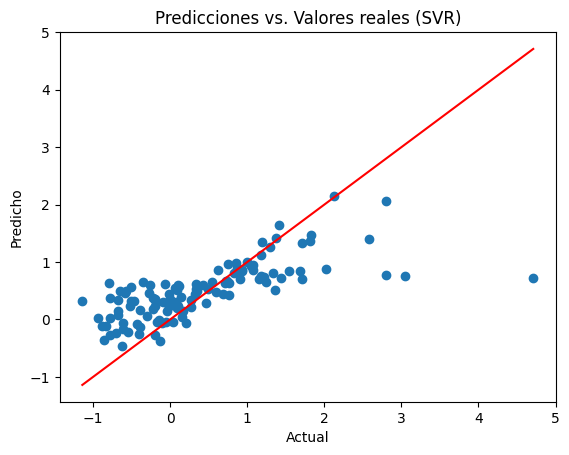

In [338]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo SVR
model_svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

# Entrenar el modelo
model_svr.fit(X_train, y_train)

# Predicción en el conjunto de prueba
pred_svr = model_svr.predict(X_test)

# Calcular métricas de evaluación
mae_train_svr = mean_absolute_error(y_train, model_svr.predict(X_train))
mae_test_svr = mean_absolute_error(y_test, pred_svr)
mse_svr = mean_squared_error(y_test, pred_svr)
r2_svr = r2_score(y_test, pred_svr)

print("MAE Entrenamiento (SVR): ", mae_train_svr)
print("MAE Prueba (SVR): ", mae_test_svr)
print("MSE (SVR): ", mse_svr)
print("R² (SVR): ", r2_svr)

# Graficar resultados
plt.scatter(y_test, pred_svr)
plt.xlabel("Actual")
plt.ylabel("Predicho")
plt.title("Predicciones vs. Valores reales (SVR)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # línea de referencia
plt.show()


In [339]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [340]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[-0.06761412,  0.01888196, -0.00042315, ...,  0.        ,
         0.        ,  0.0773957 ],
       [-0.01364989, -0.03241269, -0.01822793, ...,  0.        ,
         0.        ,  0.0812951 ],
       [ 0.00476617,  0.02940093,  0.00035804, ...,  0.        ,
         0.        ,  0.0707867 ],
       ...,
       [ 0.02490261, -0.03281497, -0.03097881, ...,  0.        ,
         0.        ,  0.08230409],
       [ 0.09683265, -0.09063667, -0.05690018, ...,  0.        ,
         0.        ,  0.06548266],
       [-0.0412176 ,  0.0046867 , -0.02675863, ...,  0.        ,
         0.        ,  0.06456601]])

In [341]:
X_test_scaled

array([[-0.06796745,  0.0289806 , -0.00797289, ...,  0.        ,
         0.        ,  0.07780014],
       [-0.06323653,  0.10759734,  0.01094987, ...,  0.        ,
         0.        ,  0.        ],
       [-0.06102553,  0.03200638,  0.00205413, ...,  0.        ,
         0.        ,  0.06985395],
       ...,
       [ 0.00528385,  0.01578309, -0.0231288 , ...,  0.        ,
         0.        ,  0.07847528],
       [ 0.00490571, -0.02280596, -0.02543728, ...,  0.        ,
         0.        ,  0.07285909],
       [ 0.00552494,  0.00244059,  0.01057104, ...,  0.        ,
         0.        ,  0.08205594]])

In [342]:
# Entrenar un modelo de SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
y_pred = svm_model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)